In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# read all files (januari-desember)

In [2]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data/')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# merge all data januari-desember

In [3]:
path = ('./SalesAnalysis/Sales_Data/')
all_data = pd.DataFrame()
files = [file for file in os.listdir(path)]
for file in files:
    df = pd.read_csv(path+file)
    all_data = pd.concat([all_data, df])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Check NaN Data

In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Delete NaN data

In [6]:
all_data = all_data.dropna(how='all')
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Delete Column Order Date thet contains str 'Or'

In [7]:
data_or = all_data[all_data['Order Date'].str[0:2] == 'Or']
data_or

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [11]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# Drop Duplicate Data

In [12]:
duplicates = all_data[all_data.duplicated(subset=['Order ID','Product'],keep=False)]
duplicates


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4
1301,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101",4
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101",4
1682,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016",4
...,...,...,...,...,...,...,...
11344,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016",9
11617,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001",9
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001",9
11620,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215",9


In [13]:
all_data.drop_duplicates(subset=['Order ID', 'Product'],keep=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# Total Sales by Month

first we create a new column named Month

In [14]:
all_data.sort_values('Month', inplace=True)

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1
3226,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1
3223,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1


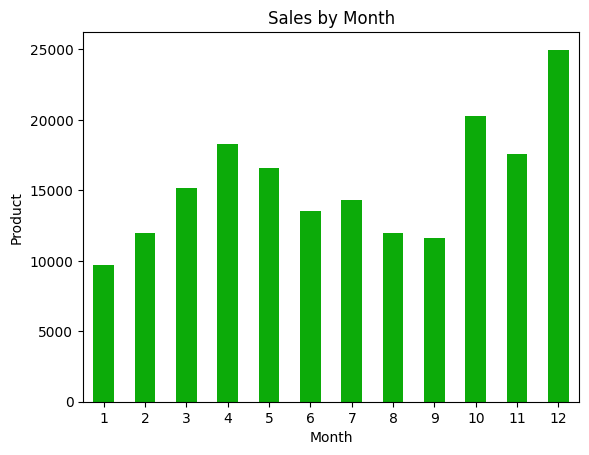

In [16]:
sales_by_month = all_data.groupby('Month')['Product'].size()
sales_by_month.plot(kind='bar', color='#0CAB09')
plt.xticks(rotation=0)
plt.xlabel(('Month'))
plt.ylabel('Product')
plt.title('Sales by Month')
plt.show()

# Creating a chart with the highest sales by City

In [17]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [18]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

now create a column [Month]

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00


In [20]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta


In [49]:
all_data.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Total Sales, dtype: float64

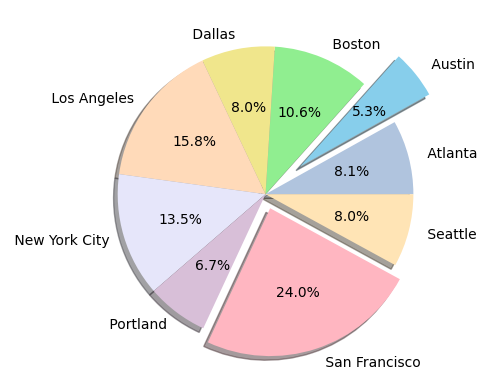

In [59]:
sales_by_city = all_data.groupby('City')['Total Sales'].sum()
explodes = [0,0.3,0,0,0,0,0,0.1,0]
balanced_colors = [
    '#B0C4DE',  # Light Steel Blue
    '#87CEEB',  # Sky Blue
    '#90EE90',  # Light Green
    '#F0E68C',  # Khaki
    '#FFDAB9',  # Peach Puff
    '#E6E6FA',  # Lavender
    '#D8BFD8',  # Thistle
    '#FFB6C1',  # Light Pink
    '#FFE4B5'   # Moccasin
]
sales_by_city.plot(kind='pie', colors=balanced_colors, autopct='%1.1f%%', shadow=True, explode=explodes)
plt.ylabel('')
plt.show()

# Creating a chart with the highest sales by Hour

In [23]:
all_data['Hour'] = all_data['Order Date'].str.split(' ').str[1].str.split(':').str[0]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston,21
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco,14
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco,19
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles,12
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta,14


In [24]:
all_data.groupby('Hour')['Product'].size()

Hour
00     3910
01     2350
02     1243
03      831
04      854
05     1321
06     2482
07     4011
08     6256
09     8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Product, dtype: int64

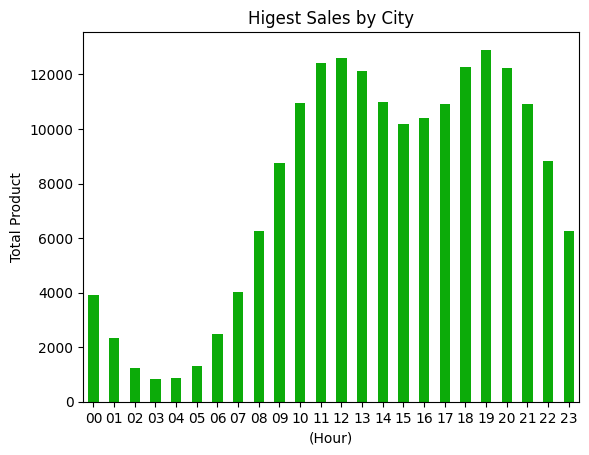

In [25]:
sales_by_hour = all_data.groupby('Hour')['Product'].size()
sales_by_hour.plot(kind='bar',color='#0CAB09')
plt.xticks(rotation=0)
plt.xlabel('(Hour)')
plt.ylabel('Total Product')
plt.title('Higest Sales by City')
plt.show()

# Creating a chart with the highest sales by Date

In [26]:
all_data['Date'] = all_data['Order Date'].str.split('/').str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Date
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston,21,01
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco,14,11
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco,19,31
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles,12,13
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta,14,21


In [27]:
all_data.groupby('Date')['Product'].size()

Date
01    6051
02    6197
03    5819
04    6066
05    6020
06    6088
07    6033
08    6073
09    6114
10    6249
11    6068
12    6093
13    6306
14    6129
15    6114
16    6116
17    6177
18    6146
19    6194
20    6148
21    6090
22    6110
23    6049
24    6150
25    6064
26    6158
27    6117
28    6103
29    5720
30    5633
31    3555
Name: Product, dtype: int64

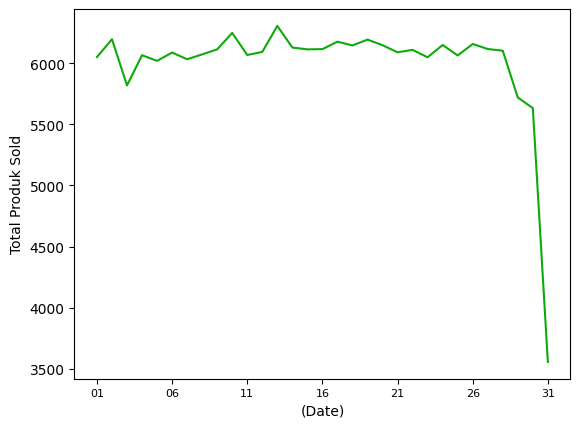

In [28]:
sales_by_date = all_data.groupby('Date')['Product'].size()
sales_by_date.plot(kind='line', color='#0CAB09')
plt.xticks(rotation=0, size=8)
plt.xlabel('(Date)')
plt.ylabel('Total Produk Sold')
plt.show()

# Creating a Chart with the Higest Sales by Products

In [39]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

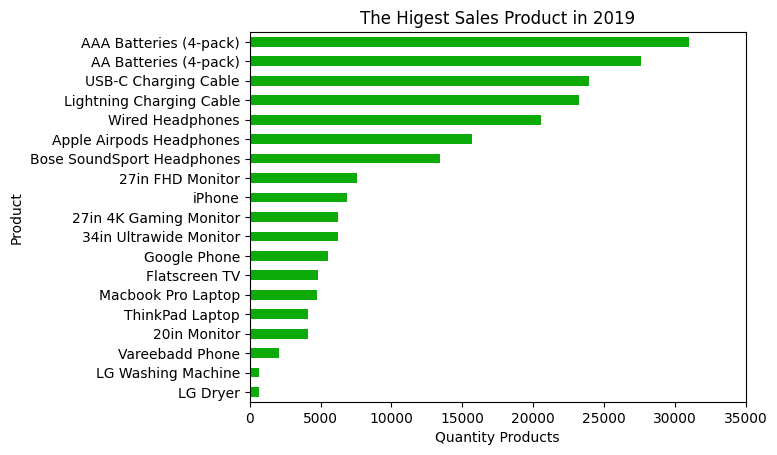

In [47]:
sales_by_product = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values()
sales_by_product.plot(kind='barh',color='#0CAB09')
plt.title('The Higest Sales Product in 2019')
plt.xlabel('Quantity Products')
plt.xticks(np.arange(0,35001,5000))
plt.show()